# t_test On Rehab patient data

In [93]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

In [84]:
basmi_df = pd.read_excel('../data/clean_basmi.xls', index_col=(0,1))

basmi_df = basmi_df.reset_index()[['BS', 'patient_id','Date', 'Drug']]
basmi_df.head()

,BS,patient_id,Date,Drug
0,3.6,40,1995-05-09,NaN
1,4.0,40,1995-06-01,NaN
2,2.6,40,1995-06-12,NaN
3,2.2,40,1995-11-02,NaN
4,2.4,40,1996-05-02,NaN


## Identify rehab patients

* For each patient:
    - calculate difference in measurement date
    - filter on measurements <= 15 and >= 10


In [106]:
def get_rehab(s):
    
    rehab_date = s[s['Date_diff'] == 14]
    
    if not rehab_date.empty:
    
        idx = rehab_date.index.values[0]
    
        rehab_period = s.loc[idx-1:idx]
    
        return rehab_period

basmi_df['Date_diff'] = basmi_df['Date'].diff().dt.days

rehab_df = basmi_df.groupby(['patient_id']).apply(get_rehab)

print('{} patients underwent rehab'.format(len(rehab_df['patient_id'].unique())))
rehab_df.head()

155 patients underwent rehab


BS  patient_id       Date Drug  Date_diff
patient_id                                                
43         60   1.4          43 2004-09-08  NaN      345.0
           61   0.4          43 2004-09-22  NaN       14.0
44         83   3.2          44 1995-07-27  NaN      136.0
           84   3.2          44 1995-08-10  NaN       14.0
46         147  3.8          46 2004-07-22  NaN       49.0

In [100]:
before = rehab_df.iloc[::2]['BS']
after = rehab_df.iloc[1::2]['BS']

print(len(before))

155


In [92]:
from scipy import stats

t, p = stats.ttest_ind(before, after)

print('t = {}'.format(t))
print('p = {}'.format(p))

t = 4.371559924373554
p = 1.6907762309652515e-05


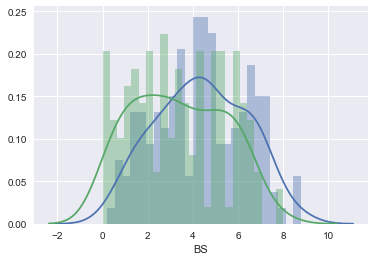

In [103]:
fig = plt.figure()
sns.distplot(before, bins=25)
sns.distplot(after, bins=25)
plt.show()